<a href="https://colab.research.google.com/github/mohamed-chamrouk/projet_AIR/blob/master/projet_AIR-Regression_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **I. PREPROCESSING & EXPLORING THE DATASET**

##Importing and displaying the dataset

In [1]:
import pandas as pd
import missingno as msno
from sklearn.model_selection import train_test_split
import numpy as np

!pip install category_encoders
import category_encoders as ce

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

import math 
import matplotlib.pyplot as plt # For plots
import os # To import external python files
import sys# To import external python files

! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
import visualization 
!wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/andrea_models.py

! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
import feature_engineering

from andrea_models import AndreaLinearRegression 
from pandas.plotting import scatter_matrix

!wget "https://drive.google.com/uc?export=download&id=1BzvT-jeNOSCItKTV95eGsUcKEtm9fn0O"

     |████████████████████████████████| 81kB 2.5MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


--2021-05-17 08:48:02--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13008 (13K) [text/plain]
Saving to: ‘visualization.py’

visualization.py    100%[===================>]  12.70K  --.-KB/s    in 0s      

2021-05-17 08:48:02 (29.1 MB/s) - ‘visualization.py’ saved [13008/13008]

--2021-05-17 08:48:02--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/andrea_models.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HT

In [2]:
!mv "uc?export=download&id=1BzvT-jeNOSCItKTV95eGsUcKEtm9fn0O" dataset.csv

Loading and displaying the dataset

In [3]:
df = pd.read_csv('dataset.csv')
df = df.rename(columns={'type':'label'})
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,19,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,29,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,39,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,49,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,59,59,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,5,0.00,0.00,0.0,0.0,1.0,0.0,0.40,86,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494016,0,tcp,http,SF,282,2286,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,203,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,18,0.17,0.11,0.0,0.0,1.0,0.0,0.17,16,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,291,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,12,0.00,0.00,0.0,0.0,1.0,0.0,0.17,26,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


##Missing values
Visualizing any eventual missing values

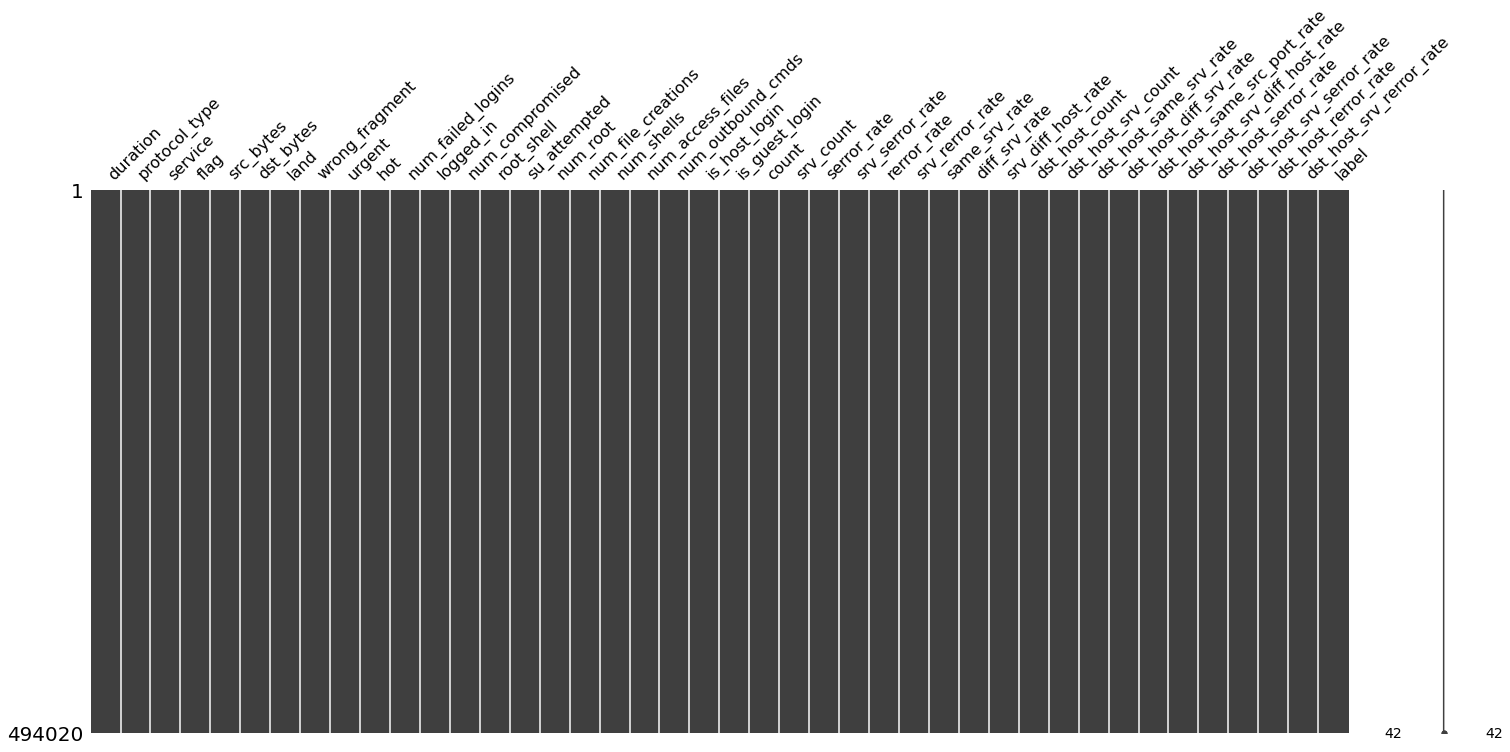

In [4]:
msno.matrix(df)

We can see that there are no missing values so we are good to go on that front!

##Categorical features

If we display the feature list as follows :



In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  num_compromised              494020 non-null  int64  
 13 

We can see that there are many non-numerical features, let's explore them :

In [6]:
np.unique(df['protocol_type'])

array(['icmp', 'tcp', 'udp'], dtype=object)

In [7]:
np.unique(df['service'])

array(['IRC', 'X11', 'Z39_50', 'auth', 'bgp', 'courier', 'csnet_ns',
       'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i',
       'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher',
       'hostnames', 'http', 'http_443', 'imap4', 'iso_tsap', 'klogin',
       'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm',
       'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u',
       'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private',
       'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh',
       'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time',
       'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois'],
      dtype=object)

In [8]:
df_service = df.groupby(['service']).count()
df_service['duration']

service
IRC           43
X11           11
Z39_50        92
auth         328
bgp          106
            ... 
urp_i        538
uucp         106
uucp_path    106
vmnet        106
whois        110
Name: duration, Length: 66, dtype: int64

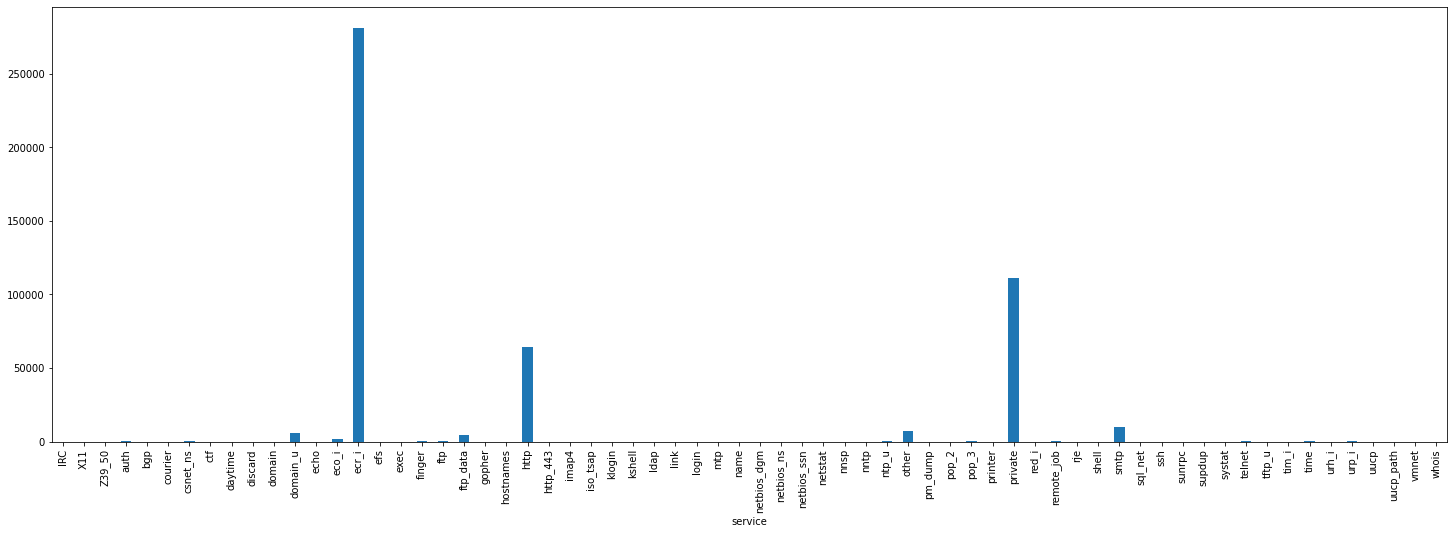

In [9]:
df_service['duration'].plot(kind='bar', figsize=(25,8))

In [10]:
np.unique(df['flag'])

array(['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3',
       'SF', 'SH'], dtype=object)

We'll use One-Hot Encoding to create features from the values in each of the three features listed above

In [11]:
encoder = ce.OneHotEncoder(cols=['protocol_type', 'service', 'flag'], use_cat_names=True)
df_encoded = encoder.fit_transform(df)
df_encoded.head()

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,duration,protocol_type_tcp,protocol_type_udp,protocol_type_icmp,service_http,service_smtp,service_finger,service_domain_u,service_auth,service_telnet,service_ftp,service_eco_i,service_ntp_u,service_ecr_i,service_other,service_private,service_pop_3,service_ftp_data,service_rje,service_time,service_mtp,service_link,service_remote_job,service_gopher,service_ssh,service_name,service_whois,service_domain,service_login,service_imap4,service_daytime,service_ctf,service_nntp,service_shell,service_IRC,service_nnsp,service_http_443,service_exec,service_printer,service_efs,...,flag_OTH,flag_SH,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


##Basic statistics and box plots

In [12]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.0,494020.0,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685232e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,0.000111,0.000036,0.011352,0.001083,0.000109,0.001008,0.0,0.0,0.001387,332.286347,292.907133,0.176687,0.176609,0.057434,0.057719,0.791547,0.020982,0.028997,232.471230,188.666034,0.753779,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,0.010551,0.007793,2.012720,0.096416,0.011020,0.036482,0.0,0.0,0.037211,213.147129,246.322733,0.380717,0.381017,0.231624,0.232147,0.388190,0.082206,0.142398,64.744665,106.040236,0.410781,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,117.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,510.000000,510.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,511.000000,511.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,1.000000,2.000000,993.000000,28.000000,2.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now displaying the box plots of some features (there are some blatant outliers that can be dealt with with the commented lines)

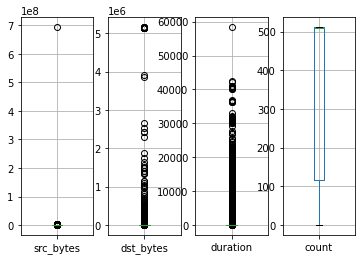

In [13]:
#y = df['src_bytes']
#df_restricted = y.between(y.quantile(0), y.quantile(0.75))
#index_names = df[~df_restricted].index
#df.drop(index_names, inplace=True)
ax = plt.subplot(1, 4, 1)
ax = df.boxplot(column=['src_bytes'], figsize=(20,10))


ax = plt.subplot(1, 4, 2)
ax = df.boxplot(column=['dst_bytes'], figsize=(20,10))



ax = plt.subplot(1, 4, 3)
ax = df.boxplot(column=['duration'], figsize=(20,10))


ax = plt.subplot(1, 4, 4)
ax = df.boxplot(column=['count'], figsize=(20,5))

We can see here that there are some extreme value making the graph less understandable. One solution to remedy that is switching to a log scale :

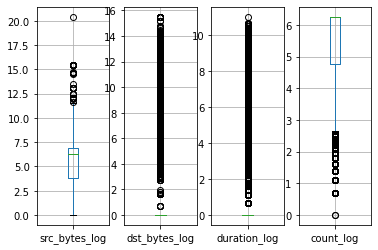

In [14]:
cols_to_transform = ['src_bytes','dst_bytes','count',
                  'duration'];

cols_transformed = [s + "_log" for s in cols_to_transform]

df[cols_transformed] = df[cols_to_transform].transform(
                        func=lambda x : np.log(1+x))

ax = plt.subplot(1, 4, 1)
ax = df.boxplot(column=['src_bytes_log'], figsize=(20,10))


ax = plt.subplot(1, 4, 2)
ax = df.boxplot(column=['dst_bytes_log'], figsize=(20,10))



ax = plt.subplot(1, 4, 3)
ax = df.boxplot(column=['duration_log'], figsize=(20,10))


ax = plt.subplot(1, 4, 4)
ax = df.boxplot(column=['count_log'], figsize=(20,5))

##Histograms and Correlation
And some histograms, although they're not easy to understand with this dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5aa4339350>,
      dtype=object)

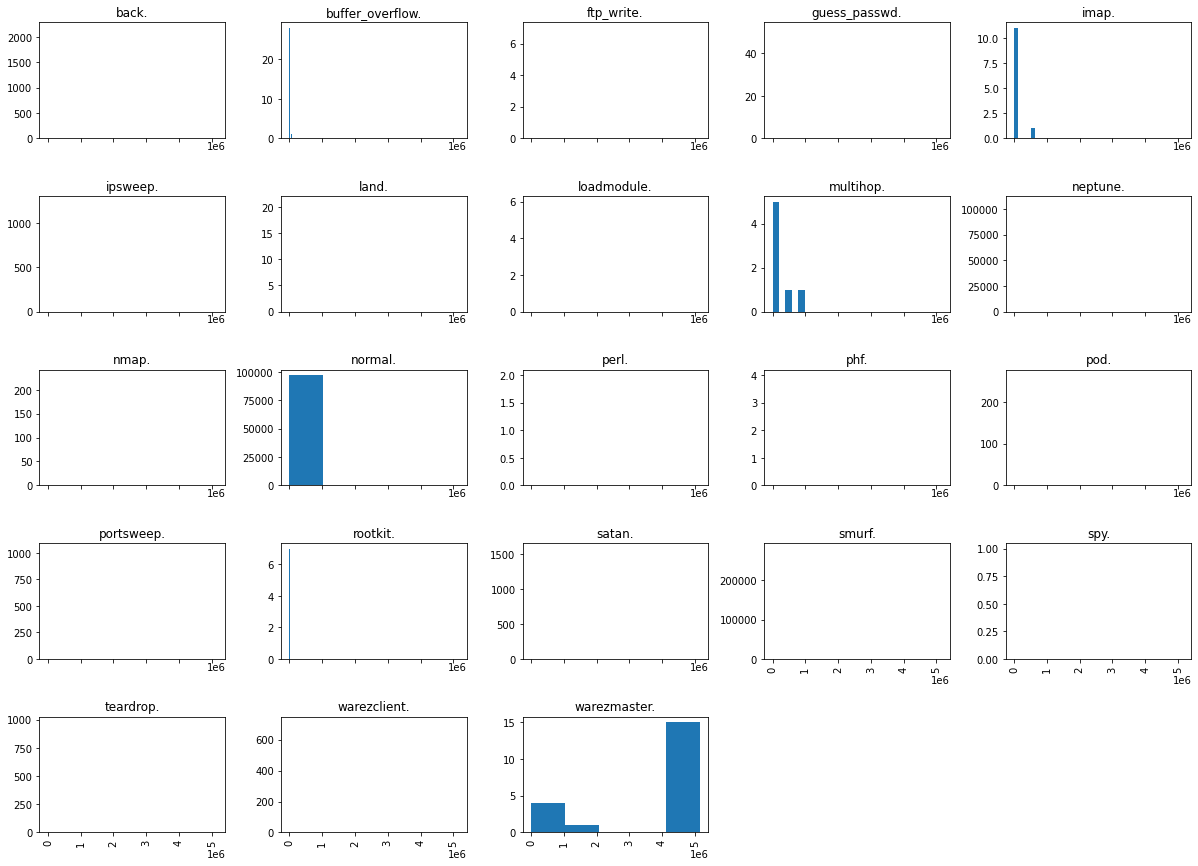

In [15]:
df[['dst_bytes', 'label']].hist(figsize=(20,15), by='label', 
                                    sharex=True, bins=5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5aa378ab10>,
      dtype=object)

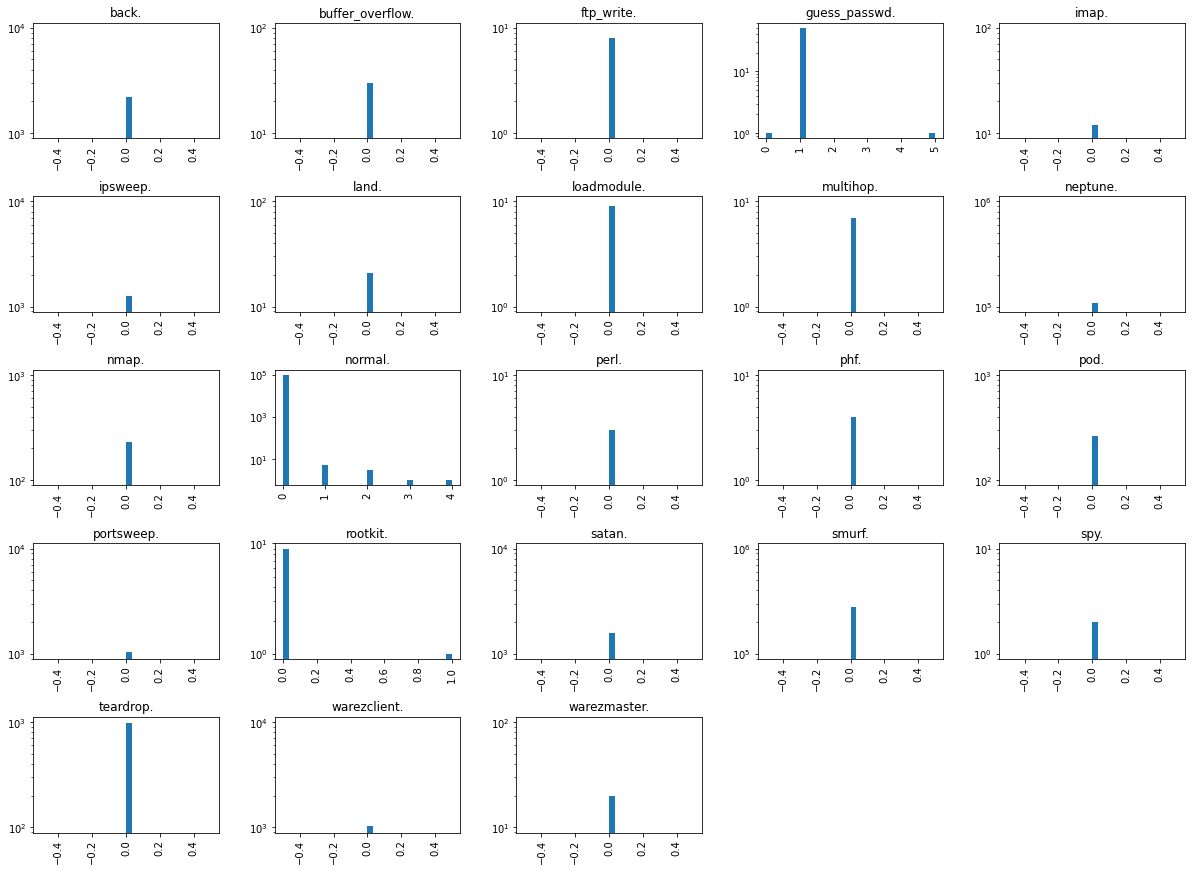

In [16]:
df[['num_failed_logins', "label"]].hist(bins=30,figsize=(20,15),log=True,by="label")

We can see that this feature is useful to identify a guess_pwd attack.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5aa165d110>,
      dtype=object)

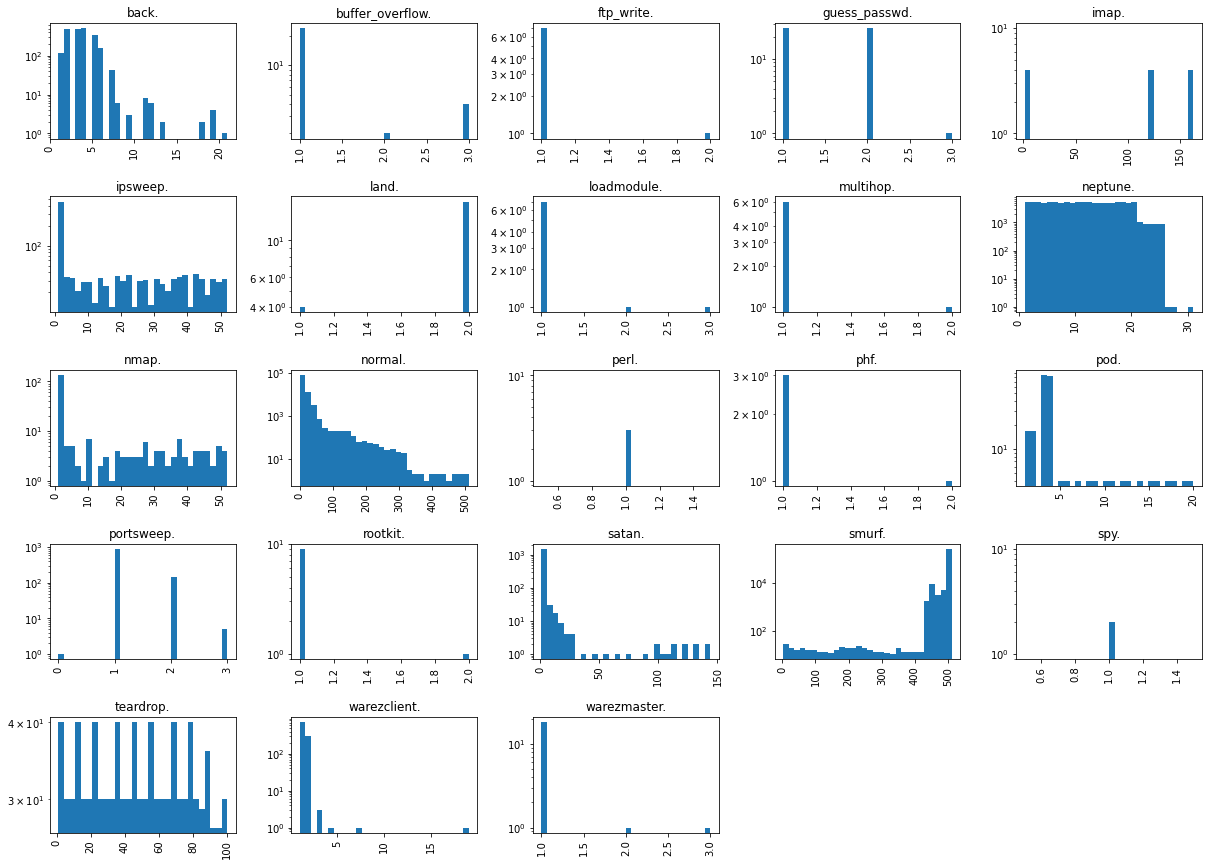

In [17]:
df[['srv_count', "label"]].hist(bins=30,figsize=(20,15),log=True,by="label")

There are some interesting histograms in there. Notably neptune and smurf taht both use a lot of connection to perform their attacks which shows here. So count and srv_count are interesting features to keep track of.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5aa0172dd0>,
      dtype=object)

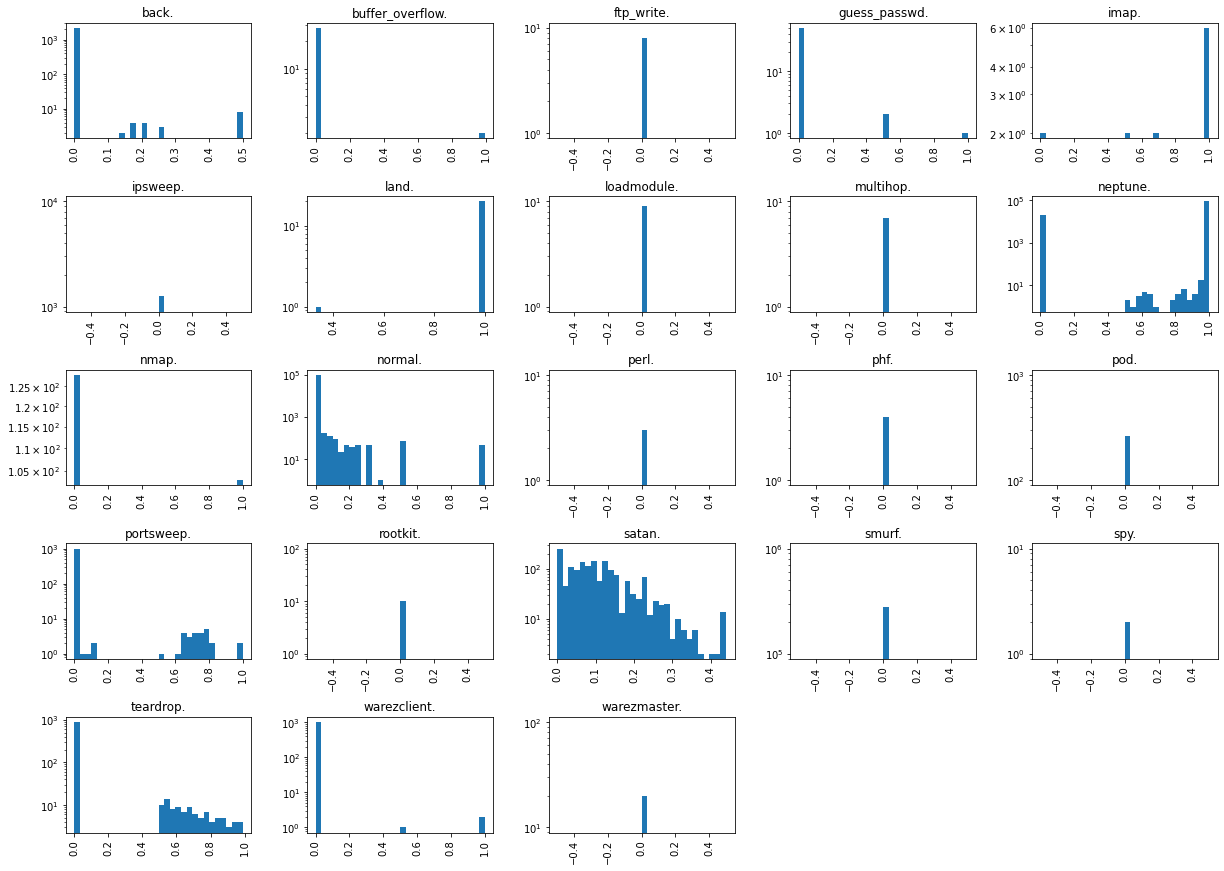

In [18]:
df[['serror_rate', "label"]].hist(bins=30,figsize=(20,15),log=True,by="label")

`serror_rate` is the rate of `SYN` error, it seems to describe well an imap, neptune and satan attack.

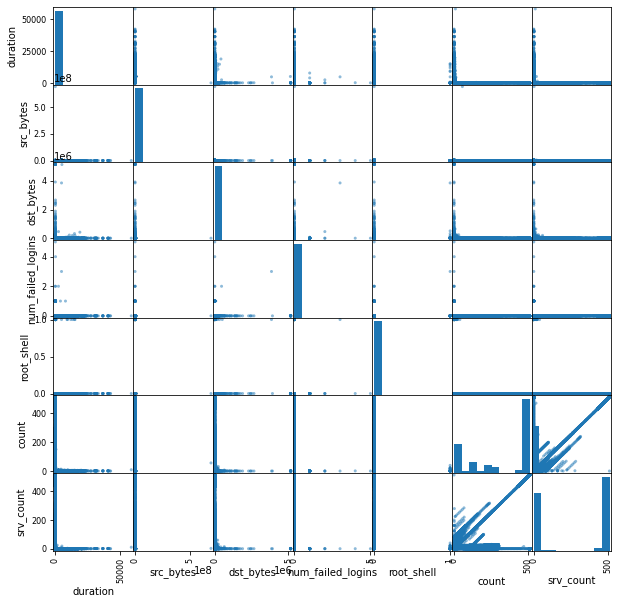

In [19]:
columns_to_plot = ['duration', 'src_bytes', 'dst_bytes', 'num_failed_logins', 'root_shell', 'count', 'srv_count', 'label']
sm = scatter_matrix(df[columns_to_plot],
                   figsize=(10,10))

plt.show()

Since `label` can't be plotted we need to replace the text with numbers.



In [20]:
mymap = {'back.':1, 'buffer_overflow.':2, 'ftp_write.':3, 'guess_passwd.':4,
       'imap.':5, 'ipsweep.':6, 'land.':7, 'loadmodule.':8, 'multihop.':9,
       'neptune.':10, 'nmap.':11, 'normal.':12, 'perl.':13, 'phf.':14, 'pod.':15,
       'portsweep.':16, 'rootkit.':17, 'satan.':18, 'smurf.':19, 'spy.':20, 'teardrop.':21,
       'warezclient.':22, 'warezmaster.':23}

cor = {"normal.":1, "smurf.":2, "neptune.":3}

connection_classes = []
for d in df['label'] :
  if d not in ["normal.", "smurf.", "neptune."] :
    connection_classes.append("attack.")
  else :
    connection_classes.append(d)

df['connection_classes'] = connection_classes

encoder = ce.OneHotEncoder(cols=['connection_classes'], use_cat_names=True)
df = encoder.fit_transform(df)

my_flag_map = {'OTH':1, 'REJ':2, 'RSTO':3, 'RSTOS0':4, 'RSTR':5, 'S0':6, 'S1':7, 'S2':8, 'S3':9,
       'SF':10, 'SH':11}

service_dict = {}

service_array = ('IRC', 'X11', 'Z39_50', 'auth', 'bgp', 'courier', 'csnet_ns',
       'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i',
       'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher',
       'hostnames', 'http', 'http_443', 'imap4', 'iso_tsap', 'klogin',
       'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm',
       'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u',
       'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private',
       'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh',
       'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time',
       'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois')

i=0
for e in service_array :
  i += 1
  service_dict[e] = i



df['flag_num'] = [my_flag_map[item] for item in df.flag]       
df['service_num'] = [service_dict[item] for item in df.service]
df['label_num'] = [mymap[item] for item in df.label]
df

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,src_bytes_log,dst_bytes_log,count_log,duration_log,connection_classes_normal.,connection_classes_attack.,connection_classes_neptune.,connection_classes_smurf.,flag_num,service_num,label_num
0,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,19,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.,5.480639,6.188264,2.197225,0.0,1,0,0,0,10,23,12
1,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,29,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,5.463832,7.198931,2.197225,0.0,1,0,0,0,10,23,12
2,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,39,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,5.393628,7.198931,1.945910,0.0,1,0,0,0,10,23,12
3,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,49,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.,5.384495,7.617268,1.945910,0.0,1,0,0,0,10,23,12
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,59,59,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.,5.384495,7.617268,1.945910,0.0,1,0,0,0,10,23,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,5,0.00,0.00,0.0,0.0,1.0,0.0,0.40,86,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.,5.739793,7.540090,1.609438,0.0,1,0,0,0,10,23,12
494016,0,tcp,http,SF,282,2286,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,5.645447,7.734996,1.945910,0.0,1,0,0,0,10,23,12
494017,0,tcp,http,SF,203,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,18,0.17,0.11,0.0,0.0,1.0,0.0,0.17,16,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.,5.318120,7.090910,1.945910,0.0,1,0,0,0,10,23,12
494018,0,tcp,http,SF,291,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,12,0.00,0.00,0.0,0.0,1.0,0.0,0.17,26,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.,5.676754,7.090910,1.945910,0.0,1,0,0,0,10,23,12


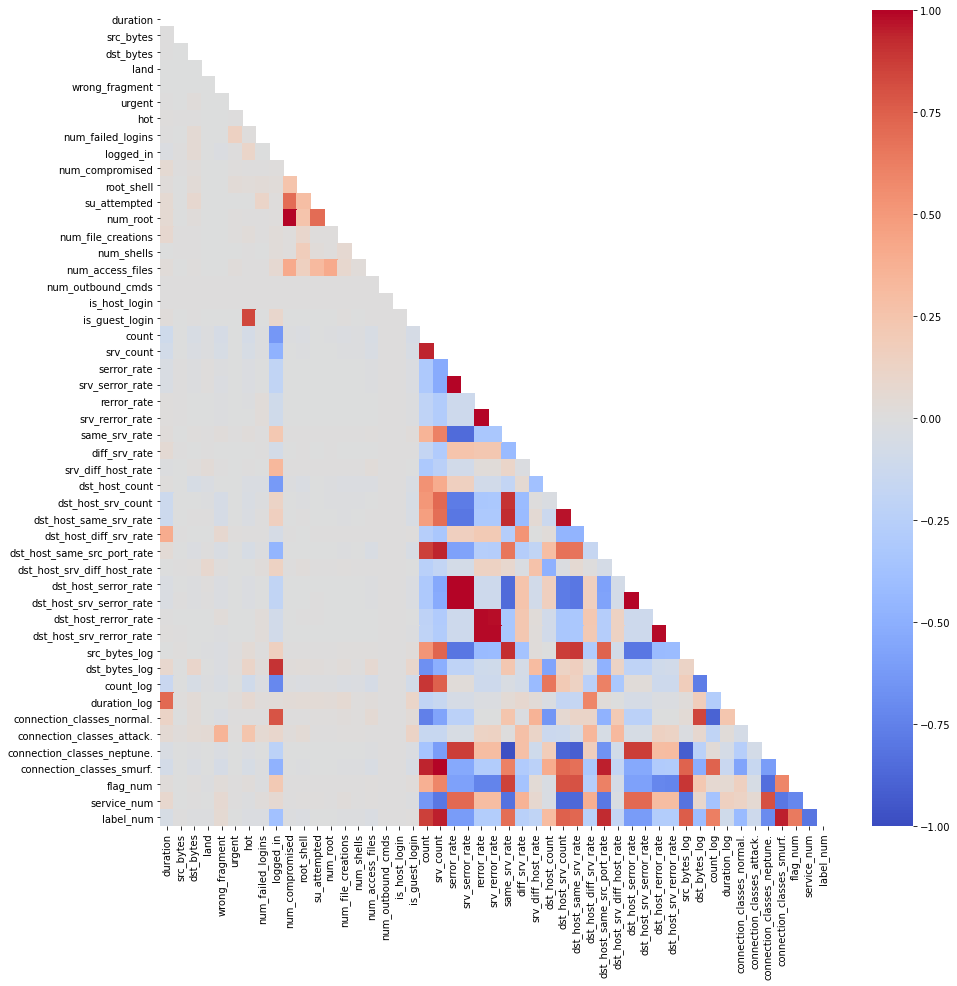

In [21]:
visualization.plot_corr(df, width=15, height=15, 
                        print_value=False)

The most correlated feature to `label` are :

In [22]:
feature_engineering.get_features_correlated_to_target(df,
                                    target_feature='label_num').head(10)

label_num                      1.00
connection_classes_smurf.      0.95
srv_count                      0.95
dst_host_same_src_port_rate    0.93
count                          0.86
service_num                   -0.81
src_bytes_log                  0.76
dst_host_srv_count             0.75
dst_host_same_srv_rate         0.73
connection_classes_neptune.   -0.70
Name: label_num, dtype: float64

#II. LINEAR REGRESSION

Let's recap our main goal : We want to predict a result using our data set

First, let's start by spliting the data set

In [23]:
df_train, df_test = train_test_split(df, test_size=0.4, random_state=15)  #Setting a random seed 
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,src_bytes_log,dst_bytes_log,count_log,duration_log,connection_classes_normal.,connection_classes_attack.,connection_classes_neptune.,connection_classes_smurf.,flag_num,service_num,label_num
243076,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,510,510,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.,6.940222,0.0,6.236370,0.0,0,0,0,1,10,15,19
471101,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,111,7,0.0,0.0,1.0,1.0,0.06,0.07,0.0,255,7,0.03,0.07,0.0,0.0,0.0,0.0,1.0,1.0,neptune.,0.000000,0.0,4.718499,0.0,0,0,1,0,2,46,10
114590,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,14,1.0,1.0,0.0,0.0,0.10,0.06,0.0,255,14,0.05,0.06,0.0,0.0,1.0,1.0,0.0,0.0,neptune.,0.000000,0.0,4.976734,0.0,0,0,1,0,6,46,10
441169,0,icmp,ecr_i,SF,520,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.,6.255750,0.0,6.238325,0.0,0,0,0,1,10,15,19
355419,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,224,7,1.0,1.0,0.0,0.0,0.03,0.06,0.0,255,7,0.03,0.07,0.0,0.0,1.0,1.0,0.0,0.0,neptune.,0.000000,0.0,5.416100,0.0,0,0,1,0,6,46,10


In [24]:
df_train[['src_bytes','label']]

,src_bytes,label
25840,252,normal.
210179,1032,smurf.
46326,1032,smurf.
245405,1032,smurf.
257395,1032,smurf.
...,...,...
180087,1032,smurf.
199301,1032,smurf.
270220,1032,smurf.
446197,520,smurf.


In [25]:
X_train = df_train[['src_bytes']].values #-> array
X_train = X_train.reshape(-1,1 )

y_train = df_train['label_num'].values

X_test = df_test[['src_bytes']].values.reshape(-1,1)
y_test = df_test['label_num'].values

In [26]:
model = AndreaLinearRegression()
model.fit(X_train, y_train, column_names=['src_bytes'])
model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1219
Date:                Mon, 17 May 2021   Prob (F-statistic):              0.727
Time:                        08:50:40   Log-Likelihood:            -8.4324e+05
No. Observations:              296412   AIC:                         1.686e+06
Df Residuals:                  296410   BIC:                         1.687e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     15.5431      0.008   2033.428      0.0

In [27]:
src_bytes_sample = np.array([520,532,1024,225]).reshape(-1,1)
predictedlabels = model.predict(src_bytes_sample)
predictedlabels

array([15.54307775, 15.54307777, 15.5430788 , 15.54307713])

In [28]:
y_pred = model.predict(X_test)

In [29]:
MSE = mean_squared_error(y_test, y_pred)
MSE

17.315609144998042

In [30]:
RMSE_one_feature = math.sqrt(MSE)
RMSE_one_feature

4.161202848335808

#III. CLASSIFICATION

We now want to split the connexions in 2 parts

*   Good connexions (normal connexions)
*   Bad connexions (intrusions or attacks)

In [31]:
good_connexion = (df['label']=='normal.').astype(np.int)
good_connexion.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [32]:
df['good_connexion'] = good_connexion
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df, test_size=0.2, random_state=2)

columns = ['count', 'num_failed_logins', 'serror_rate', 'dst_bytes']

X_train = df_train[columns]
X_test = df_test[columns]
y_train = df_train['good_connexion']
y_test = df_test['good_connexion']

In [33]:
model = LogisticRegression(C=1e-9)
model.fit(X_train, y_train)

LogisticRegression(C=1e-09, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_score(y_test, y_pred)

0.9802841990202826

Normalized confusion matrix
[[0.97959261 0.02040739]
 [0.01687109 0.98312891]]


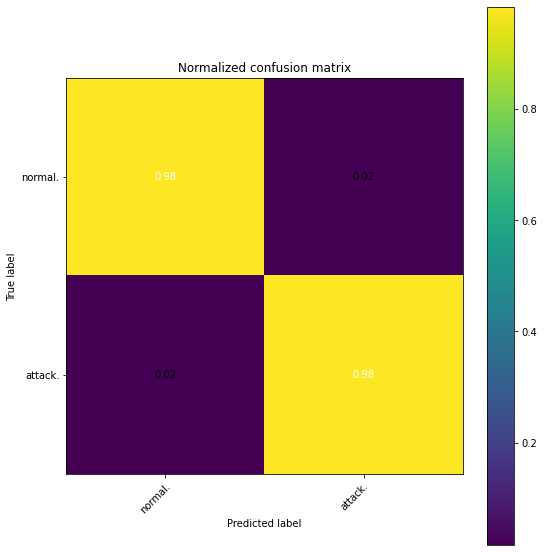

In [36]:
from visualization import plot_conf_mat

class_names=np.array(["normal.", "attack."] )

plot_conf_mat(y_test, y_pred, class_names)

##Normalization

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [38]:
model = LogisticRegression(C=1)
model.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

In [39]:
accuracy_score(y_pred, y_test)

0.9843528602080888

Normalized confusion matrix
[[0.98296448 0.01703552]
 [0.00993635 0.99006365]]


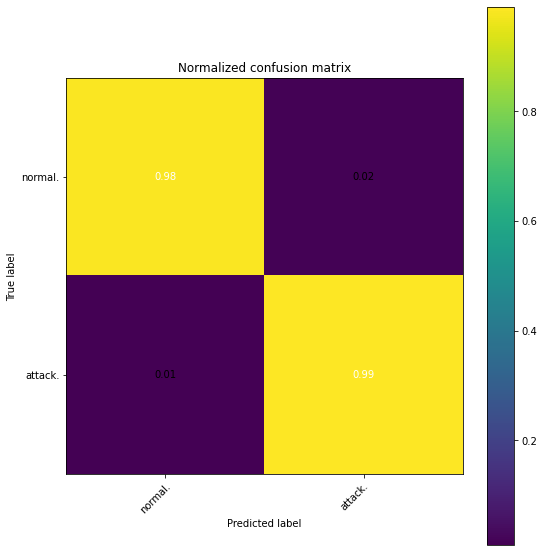

In [40]:
class_names=np.array(["normal.", "attack."] )

plot_conf_mat(y_test, y_pred, class_names)

## Multinomial Logistic Classification

In [41]:
from sklearn.pipeline import make_pipeline

df['label'].value_counts()

smurf.              280790
neptune.            107201
normal.              97277
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

In [42]:
connection_classes = [0 if d == "normal."
       else 1 if d == "smurf."
       else 2 if d == "neptune."
       else 3 if d == "back."
       else 4
      for d in df['label'] 
      ]

df['connection_classes'] = connection_classes

df.head(n=50000)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,src_bytes_log,dst_bytes_log,count_log,duration_log,connection_classes_normal.,connection_classes_attack.,connection_classes_neptune.,connection_classes_smurf.,flag_num,service_num,label_num,good_connexion,connection_classes
0,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,5.480639,6.188264,2.197225,0.0,1,0,0,0,10,23,12,1,0
1,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,5.463832,7.198931,2.197225,0.0,1,0,0,0,10,23,12,1,0
2,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,5.393628,7.198931,1.945910,0.0,1,0,0,0,10,23,12,1,0
3,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,5.384495,7.617268,1.945910,0.0,1,0,0,0,10,23,12,1,0
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,5.384495,7.617268,1.945910,0.0,1,0,0,0,10,23,12,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,smurf.,6.940222,0.000000,6.238325,0.0,0,0,0,1,10,15,19,0,1
49996,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,smurf.,6.940222,0.000000,6.238325,0.0,0,0,0,1,10,15,19,0,1
49997,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,smurf.,6.940222,0.000000,6.238325,0.0,0,0,0,1,10,15,19,0,1
49998,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,smurf.,6.940222,0.000000,6.238325,0.0,0,0,0,1,10,15,19,0,1


In [43]:
def MyMultinomialRegression(C=1e-3):
    return make_pipeline(
        StandardScaler(),
        LogisticRegression(multi_class="multinomial", solver="lbfgs", C=C)
    )

In [44]:
df_train, df_test = train_test_split(df,test_size=0.2, random_state=1)

y_train = df_train['connection_classes']
y_test = df_test['connection_classes']

model = MyMultinomialRegression(C=1)
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='multinomial', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [45]:
accuracy_score(y_pred, y_test)

y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.5683170721833124

Normalized confusion matrix
[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


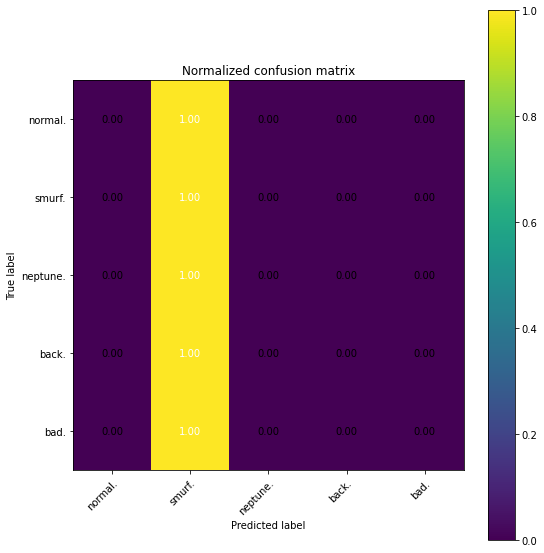

In [46]:
class_names=np.array(["normal.", "smurf.", "neptune.", "back.", "bad."] )

plot_conf_mat(y_test, y_pred, class_names)

### Class imbalance

In [47]:
from imblearn.over_sampling import SMOTE

df['connection_classes'].value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


1    280790
2    107201
0     97277
4      6549
3      2203
Name: connection_classes, dtype: int64

In [48]:
y_pred = [2 for i in range(len(y_test))]
accuracy_score(y_pred, y_test)

0.2174810736407433

In [49]:
smote = SMOTE()

X_train_balanced, y_train_balanced = smote.fit_sample(X_train, y_train)
pd.value_counts(y_train_balanced)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

4    224638
3    224638
2    224638
1    224638
0    224638
dtype: int64

Normalized confusion matrix
[[5.71935965e-01 2.49137798e-01 1.13244454e-03 3.08848510e-04
  1.77484944e-01]
 [5.72196894e-01 2.49056133e-01 8.01396210e-04 2.13705656e-04
  1.77731871e-01]
 [5.68410276e-01 2.52233805e-01 7.44601638e-04 9.30752048e-05
  1.78518243e-01]
 [5.87837838e-01 2.43243243e-01 0.00000000e+00 0.00000000e+00
  1.68918919e-01]
 [5.80819799e-01 2.52900232e-01 7.73395205e-04 0.00000000e+00
  1.65506574e-01]]


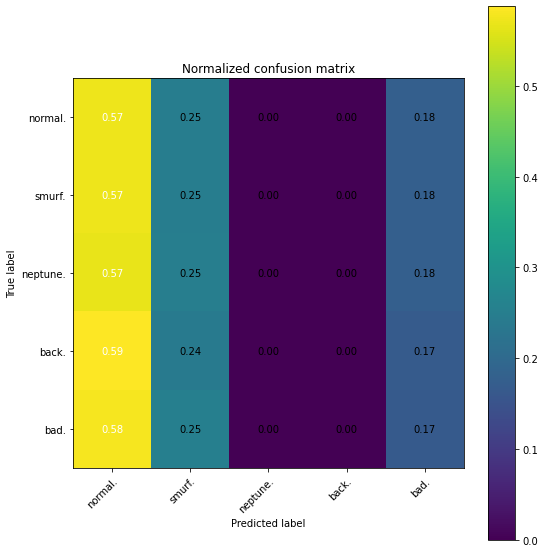

In [50]:
model.fit(X_train_balanced, y_train_balanced)
y_pred = model.predict(X_test)
plot_conf_mat(y_test, y_pred,class_names)


In [51]:
accuracy_score(y_pred, y_test)

0.2563256548317882

# IV. Trees and ensemble 

In [79]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from visualization import plot_conf_mat, plot_feature_importances
from google.colab import drive
from os.path import isfile
import pickle


In [73]:
mount_point = '/content/gdrive' # Always the same, don't change it
drive.mount(mount_point, force_remount=True)
drive_path = mount_point + '/My Drive/' # Always the same, don't change it
my_path = drive_path + \
  'tsp/' 

Mounted at /content/gdrive


In [55]:
model = RandomForestClassifier(n_estimators=100, 
                      criterion='gini', 
                      max_leaf_nodes=16, # Each tree cannot have more than that
                      random_state=5, # For reproducibility
                      n_jobs=-1, # Use all the CPUs
                      max_features = 'auto' # auto means=sqrt(n_features)
                      )

model.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=16, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [62]:
y_pred = model.predict(X_test)



In [63]:
class_names = np.array(['smurf.','neptune.','normal.', 'back.','satan.','ipsweep.','portsweep.', 'warezclient.', 'teardrop.','pod.', 'nmap.', 'guess_passwd.', 'buffer_overflow.', 'warezmaster.', 'land.', 'ftp_write.', 'rootkit.', 'imap.', 'multihop.', 'loadmodule.', 'phf.', 'perl.'])

Normalized confusion matrix
[[0.57425233 0.17161682 0.00077212 0.05250425 0.20085448]
 [0.57287363 0.17331529 0.00110415 0.0523935  0.20031343]
 [0.56948064 0.17251489 0.00120998 0.05230827 0.20448622]
 [0.58783784 0.17567568 0.         0.05405405 0.18243243]
 [0.57849961 0.18097448 0.0007734  0.05568445 0.18406806]]


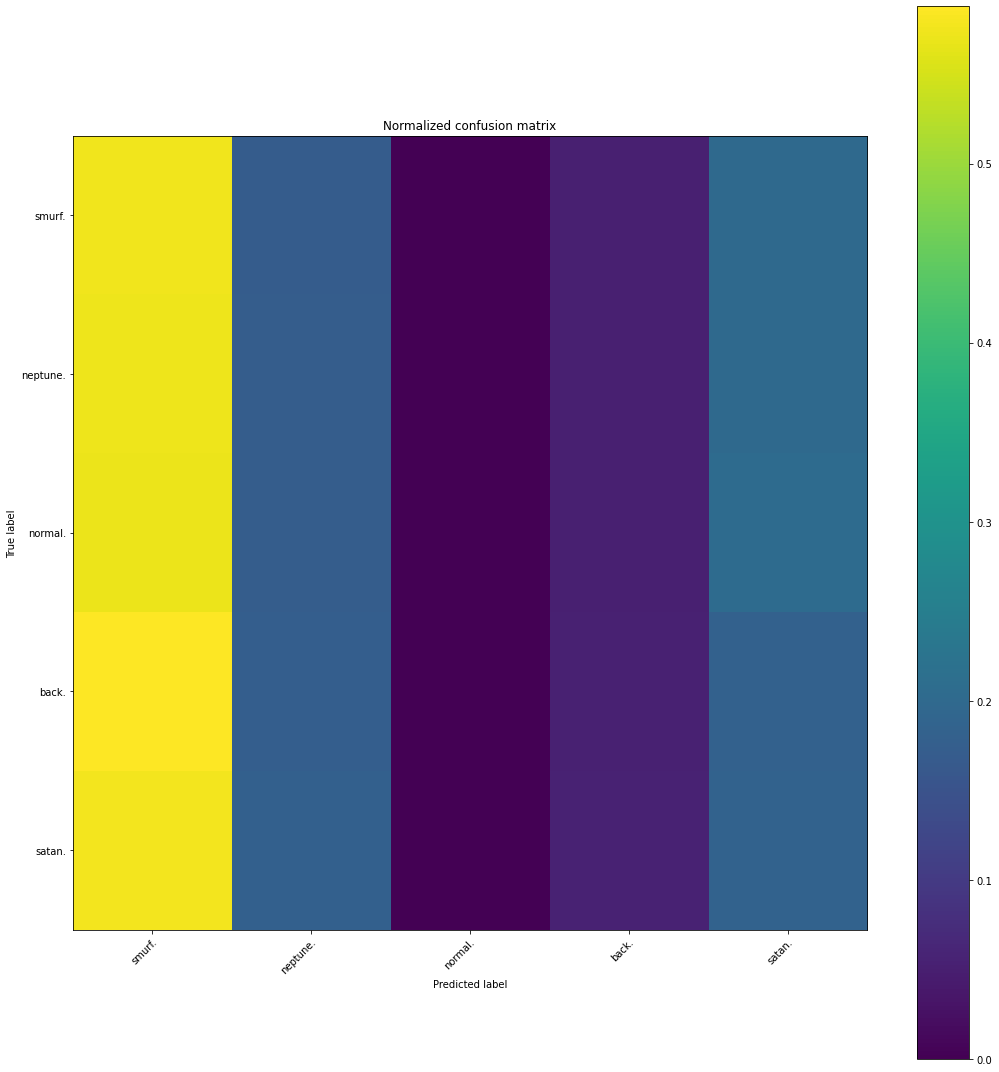

In [64]:
plot_conf_mat(y_test, y_pred, class_names, text=False, width=15, height=15)

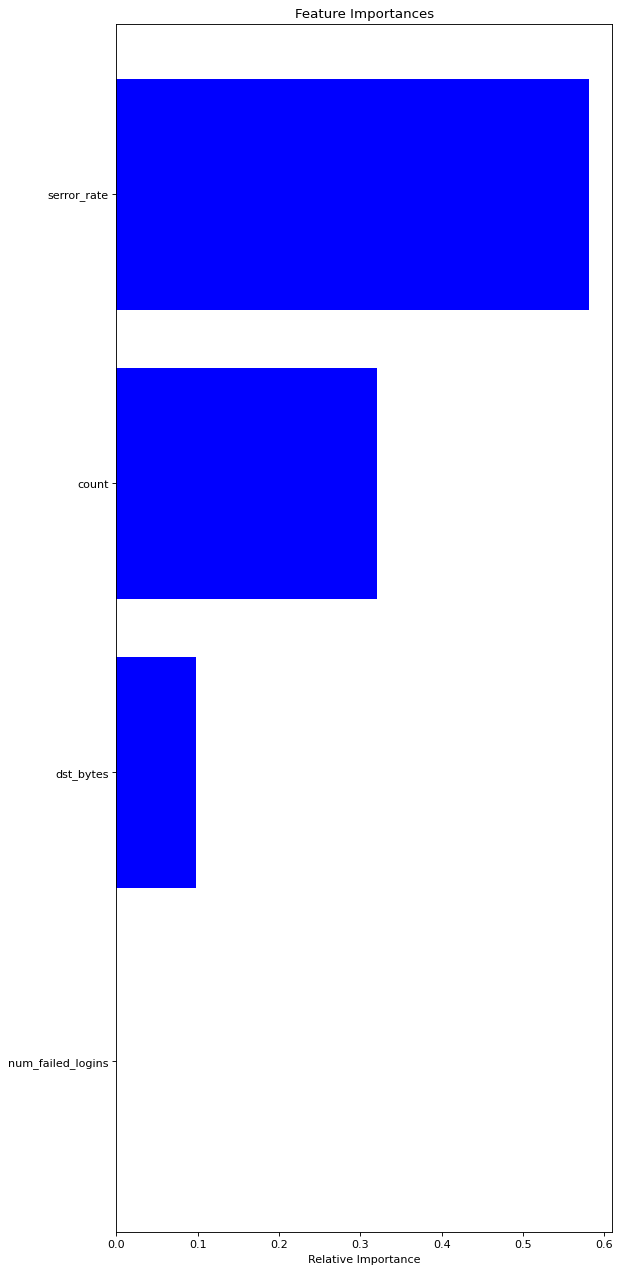

Index(['count', 'num_failed_logins', 'serror_rate', 'dst_bytes'], dtype='object')

In [67]:
plt.figure(num=None, figsize=(8, 20), dpi=80, facecolor='w', edgecolor='k') #making the graph bigger

feature_names = X_test.columns
plot_feature_importances(model.feature_importances_, feature_names)
feature_names

Let's focus on finetuning on hyperparam

In [68]:
param_grid = {
    'criterion':['gini', 'entropy'],
    'max_features':[1,2,3,4,5],

    # Number of allowed leafs
    'max_leaf_nodes':[16, 32, 64, 128, 256, 512, 1024, 2048],

    # A node will be split if this split induces a decrease of the 
    # impurity greater than or equal to this value.
    'min_impurity_decrease' : [0, 0.001, 0.01, 0.1, 0.2],
            
    'max_depth':[1,10,100,1000,10000,100000],

    # A node can be a leaf only if it contains at least the following fraction
    # of samples
    'min_weight_fraction_leaf' : [0.1, 0.01, 0.001, 0]
    
}

In [69]:
# Note that we use 1 CPU per classifier, since we are training different 
# classifiers
forest = RandomForestClassifier(n_estimators=100, random_state = 4, n_jobs=1,)


search = RandomizedSearchCV(
                            scoring = 'accuracy', # See other possible metrics in
                                                # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
                            
                            estimator=forest, 
                            param_distributions=param_grid,
                            n_iter=50, # We just test 50 configurations
                            verbose=2,random_state=42, 
                            n_jobs=-1, # Triain forests in parallel using 
                                      # all CPUs
                            cv=5 # 5-fold validation                      
                          )

search.fit(X_test, y_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

{'min_weight_fraction_leaf': 0.001, 'min_impurity_decrease': 0.01, 'max_leaf_nodes': 128, 'max_features': 1, 'max_depth': 1000, 'criterion': 'entropy'}
Normalized confusion matrix
[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


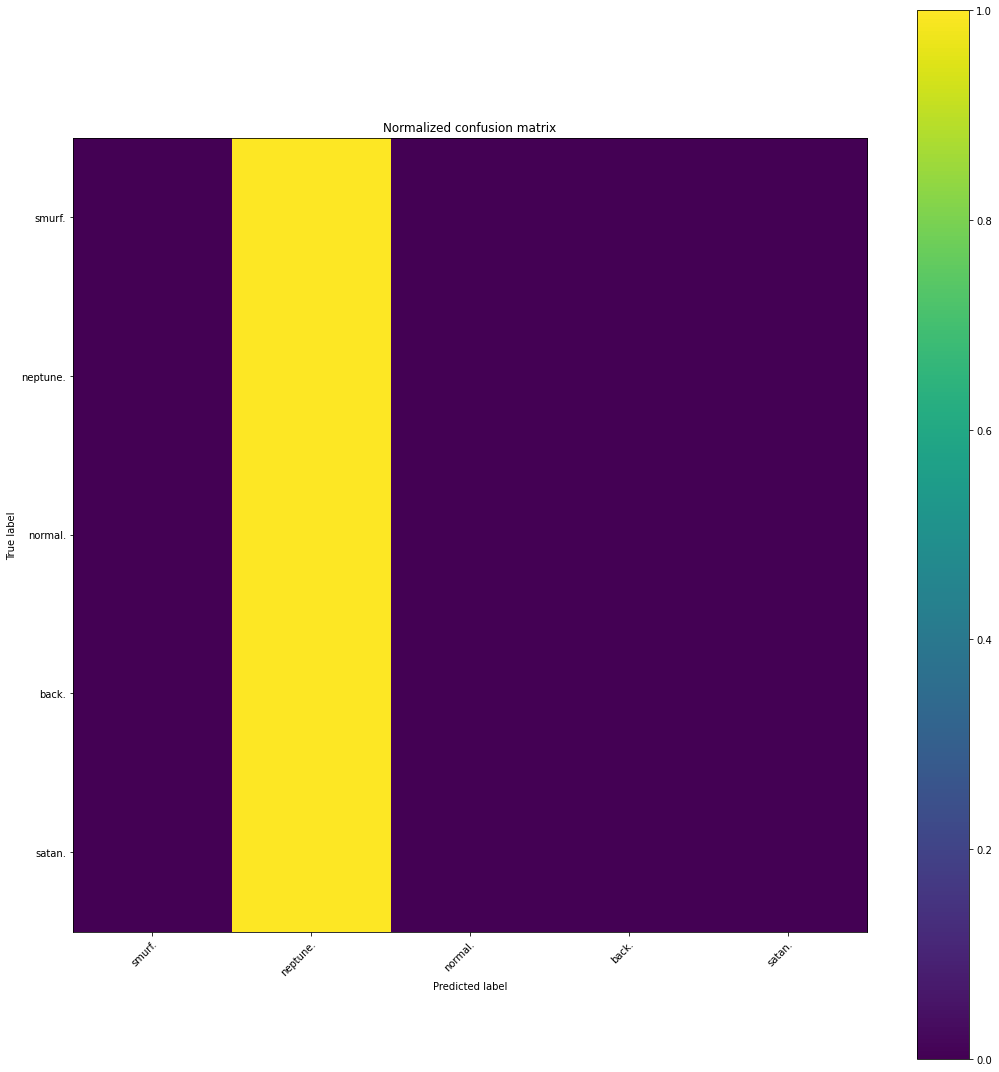

In [74]:
print(search.best_params_)

model = search.best_estimator_
y_pred = model.predict(X_test)

plot_conf_mat(y_test, y_pred, class_names, text=False, width=15, height=15)



In [75]:
def search_or_load(model_filename, search):
  if(isfile(model_filename) ):
    model = pickle.load(open(model_filename, 'rb'))

  else:
    search.fit(X_train, y_train)
    print(search.best_params_)
    model = search.best_estimator_
    pickle.dump(model, open(model_filename, 'wb'))

  return model

In [80]:
filename = my_path+'forest-1.pkl'
model = search_or_load(filename, search)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 16.6min finished


{'min_weight_fraction_leaf': 0.001, 'min_impurity_decrease': 0.01, 'max_leaf_nodes': 128, 'max_features': 1, 'max_depth': 1000, 'criterion': 'entropy'}


In [ ]:
forest = RandomForestClassifier(n_estimators=100, random_state = 4, n_jobs=1,)


search = RandomizedSearchCV(
                            scoring = 'accuracy',
                            
                            estimator=forest, 
                            param_distributions=param_grid,
                            n_iter=200,
                            verbose=2,random_state=42, 
                            n_jobs=-1,
                                      
                            cv=5                      
                          )


filename = my_path + 'forest-2-meilleur.pkl'
model = search_or_load(filename, search)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 14.1min


In [ ]:
y_pred = model.predict(X_test)
class_names = np.array(['smurf.','neptune.','normal.', 'back.','satan.','ipsweep.','portsweep.', 'warezclient.', 'teardrop.','pod.', 'nmap.', 'guess_passwd.', 'buffer_overflow.', 'warezmaster.', 'land.', 'ftp_write.', 'rootkit.', 'imap.', 'multihop.', 'loadmodule.', 'phf.', 'perl.'])

plot_conf_mat(y_test, y_pred, class_names, text=False, width=13, height=13)

Let's try by splitting the attack types.

In [ ]:
label_array = ['smurf.','neptune.','normal.', 'back.','satan.','ipsweep.','portsweep.', 'warezclient.', 'teardrop.','pod.', 'nmap.', 'guess_passwd.', 'buffer_overflow.', 'warezmaster.', 'land.', 'ftp_write.', 'rootkit.', 'imap.', 'multihop.', 'loadmodule.', 'phf.', 'perl.', 'spy.']
dos = ['back.','land.','neptune.','pod.','smurf.','teardrop.']
u2r = ['buffer_overflow.','loadmodule.','perl.','rootkit.']
r2l = ['ftp_write.','guess_passwd.','imap.','multihop.','phf.','spy.','warezclient.','warezmaster.']
probe = ['ipsweep.','nmap.','portsweep.','satan.']
dictionnary_lite = {'normal.':0}
for label in label_array:
  if ((label != 'normal.') and (label not in dictionnary_lite)):
    if label in dos:
      dictionnary_lite[label]=1
    elif label in u2r:
      dictionnary_lite[label]=2
    elif label in r2l:
      dictionnary_lite[label]=3
    elif label in probe:
      dictionnary_lite[label]=4
    else:
      print("Error",label)
      break
label_array_lite = ['normal','dos','u2r','r2l','probe']
print(dictionnary_lite)
dfp_lite = dfp.replace({'label' : dictionnary_lite})
dfp_encoded.shape
